In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head(5)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df= df[[#'RowNumber', 'CustomerId', 'Surname',
     'CreditScore',   'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'
       ]].copy()

In [6]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)


In [8]:
df1 = pd.get_dummies(data=df, columns=['Geography', 'Gender'])
df1.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_0', 'Gender_1'],
      dtype='object')

In [9]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column}: {df[column].unique()}')

In [10]:
print_unique_col_values(df)


Geography: ['France' 'Spain' 'Germany']


In [11]:
df1.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_0,Gender_1
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,False,True
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,False,True
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,False,True
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,False,True
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,False,True


In [12]:
df.dtypes

CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [13]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

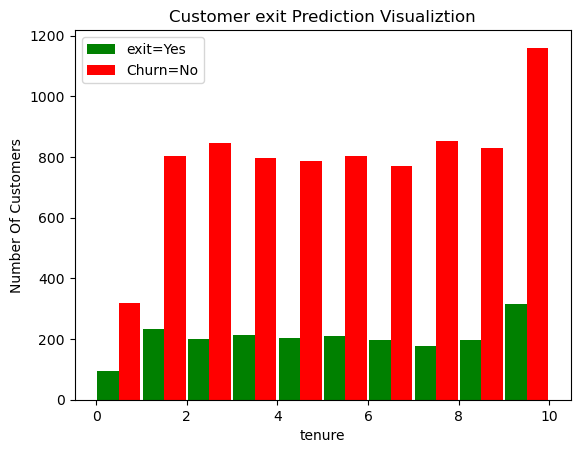

In [14]:
tenure_exited_no=df[df.Exited==0].Tenure
tenure_exited_yes=df[df.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer exit Prediction Visualiztion")


plt.hist([tenure_exited_yes, tenure_exited_no], rwidth=0.95, color=['green','red'],label=['exit=Yes','Churn=No'])
plt.legend()

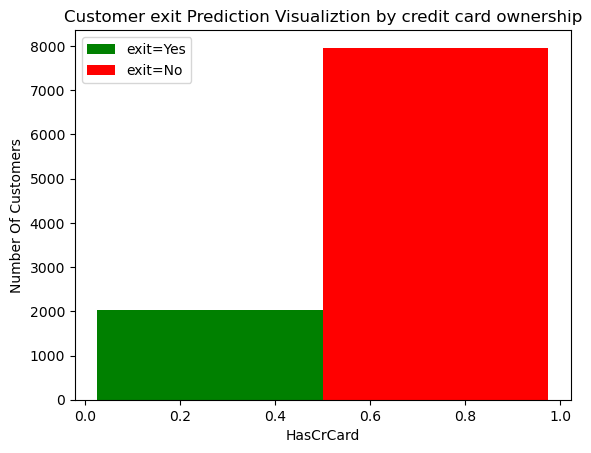

In [15]:
tenure_creditcard_no=df[df.Exited==0].HasCrCard
tenure_creditcard_yes=df[df.Exited==1].HasCrCard

plt.xlabel("HasCrCard")
plt.ylabel("Number Of Customers")
plt.title("Customer exit Prediction Visualiztion by credit card ownership")


plt.hist([tenure_creditcard_yes, tenure_creditcard_no], rwidth=0.95, color=['green','red'],label=['exit=Yes','exit=No'],bins=[-0.0,1.0])
plt.legend()

In [16]:

X = df1.drop('Exited', axis=1)

# Extract the target variable
y = df1['Exited']


In [17]:

scalecolls=["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
df1[scalecolls]=scaler.fit_transform(df[scalecolls])

        

In [18]:
df1[scalecolls] = scaler.fit_transform(df1[scalecolls])

Tenure GÖREV SÜRESİ DEMMEK

In [19]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_0,Gender_1
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,True,False,False,False,True
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,False,False,True,False,True
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,True,False,False,False,True
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,True,False,False,False,True
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,False,False,True,False,True


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
len(X_train.columns)


13

In [22]:
from sklearn.metrics import classification_report


In [23]:
def ANN(X_train, y_train, X_test, y_test, loss):
    model = keras.Sequential([
        keras.layers.Dense(13, input_dim=13, activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    
    model.fit(X_train, y_train, epochs=100)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [24]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')


Epoch 1/100


c:\Users\cagla\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7466 - loss: 2627.1125
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.6566 - loss: 52.1000
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.6799 - loss: 28.4290
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.6656 - loss: 36.6955
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.6827 - loss: 37.3858
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6758 - loss: 37.9383
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.6734 - loss: 40.1713
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6730 - loss: 37.4113 
Epoch 9/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6816 - loss: 42.9991  
Epoch 10/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6799 - loss: 35.3698
Epoch 11/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.6828 - loss: 33.5980
Epoch 12/100
219/219 ━━━━

Gördüğümüz gibi, dengesiz veri seti nedeniyle Sınıf 1'in hassasiyeti(precision), (hatırlama) recall ve f1 puanı çok düşük

Veri Çarpıklığını azaltalım
Method 1: Undersampling

In [25]:
# Class count
count_class_0, count_class_1 = df1.Exited.value_counts()

# Divide by class
df_class_0 = df1[df1['Exited'] == 0]
df_class_1 = df1[df1['Exited'] == 1]

In [26]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1) #0 sınıfındaki örnek sayısını 1 sınıfındaki örnek sayısıyla eşitlemek için 0 sınıfından rastgele örnekler seçer (df_class_0_under). Sonra her iki sınıfı df_test_under DataFrame'inde birleştirir.
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Exited.value_counts())

Random under-sampling:
Exited
0    2037
1    2037
Name: count, dtype: int64


In [27]:
from sklearn.model_selection import train_test_split
X = df_test_under.drop('Exited', axis='columns')
y = df_test_under['Exited']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=15, stratify=y)

In [28]:
# Number of classes in training Data
y_train.value_counts()

Exited
1    1630
0    1629
Name: count, dtype: int64

In [29]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')


Epoch 1/100


c:\Users\cagla\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 911us/step - accuracy: 0.5532 - loss: 0.6907
Epoch 2/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.5674 - loss: 0.6755
Epoch 3/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6198 - loss: 0.6565
Epoch 4/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.6444 - loss: 0.6404
Epoch 5/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.6505 - loss: 0.6265
Epoch 6/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6744 - loss: 0.6069
Epoch 7/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - accuracy: 0.6684 - loss: 0.6013
Epoch 8/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.6966 - loss: 0.5866
Epoch 9/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.7075 - loss: 0.5769
Epoch 10/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.7115 - loss: 0.5729
Epoch 11/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.7249 - loss: 0.5622
Epoch 12/100
102/102 ━━━━━━━━━━━━━━

Yöntem2: Aşırı Örnekleme

In [30]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Exited.value_counts())

Random over-sampling:
Exited
0    7963
1    7963
Name: count, dtype: int64


In [31]:
from sklearn.model_selection import train_test_split
X = df_test_over.drop('Exited', axis='columns')
y = df_test_over['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [32]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')


Epoch 1/100


c:\Users\cagla\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 797us/step - accuracy: 0.5745 - loss: 0.6743
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6540 - loss: 0.6224
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.6826 - loss: 0.5951
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.6976 - loss: 0.5836
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7018 - loss: 0.5770
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.7141 - loss: 0.5576
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.7288 - loss: 0.5420
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.7366 - loss: 0.5281
Epoch 9/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.7420 - loss: 0.5238
Epoch 10/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7453 - loss: 0.5115
Epoch 11/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.7492 - loss: 0.5060
Epoch 12/100
399/399 ━━━━━━━━━━━━━━━━

Yöntem 3: SMOTE 

In [33]:
X = df1.drop('Exited', axis='columns')
y = df1['Exited']

In [34]:
from imblearn.over_sampling import SMOTE
smote= SMOTE(sampling_strategy="minority")
X_sm, y_sm =smote.fit_resample(X,y)
y_sm.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [36]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')


Epoch 1/100


c:\Users\cagla\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6034 - loss: 0.6618
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6784 - loss: 0.6056
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7034 - loss: 0.5723
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7110 - loss: 0.5683
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7094 - loss: 0.5671
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7182 - loss: 0.5484
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7293 - loss: 0.5420
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7375 - loss: 0.5253
Epoch 9/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7524 - loss: 0.5109
Epoch 10/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7554 - loss: 0.4998
Epoch 11/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7607 - loss: 0.4853
Epoch 12/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=15, stratify=y)


In [38]:
df2= X_train.copy()
df2["Exited"]= y_train

In [39]:
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_0,Gender_1,Exited
5710,0.856,0.216216,0.5,0.554265,0.333333,0,0,0.339721,True,False,False,True,False,0
3745,0.852,0.256757,0.1,0.371163,0.333333,1,1,0.980432,False,True,False,False,True,0
5429,0.664,0.405405,0.7,0.000000,0.333333,1,0,0.325318,True,False,False,False,True,0
551,0.648,0.391892,0.6,0.426077,0.000000,1,1,0.010339,False,True,False,True,False,1
8967,0.970,0.094595,0.7,0.000000,0.333333,1,1,0.417230,True,False,False,True,False,0


In [40]:
df2_class0 = df2[df2.Exited == 0]
df2_class1 = df2[df2.Exited == 1]

In [41]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Exited', axis='columns')
    y_train = df_train.Exited
    return X_train, y_train

In [42]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100


c:\Users\cagla\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 870us/step - accuracy: 0.5294 - loss: 0.7199
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.5603 - loss: 0.6838
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.5849 - loss: 0.6784
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.6040 - loss: 0.6634
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.6439 - loss: 0.6476
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.6482 - loss: 0.6330
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.6551 - loss: 0.6187
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.6848 - loss: 0.6017
Epoch 9/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.6839 - loss: 0.5952
Epoch 10/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7024 - loss: 0.5873
Epoch 11/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6998 - loss: 0.5791
Epoch 12/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc

In [43]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100


c:\Users\cagla\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5572 - loss: 0.6843
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6271 - loss: 0.6595
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.6325 - loss: 0.6397
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.6670 - loss: 0.6172
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.6896 - loss: 0.6050
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.6882 - loss: 0.6058
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - accuracy: 0.6973 - loss: 0.5847
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7109 - loss: 0.5756  
Epoch 9/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.7154 - loss: 0.5656
Epoch 10/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7007 - loss: 0.5843
Epoch 11/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.7161 - loss: 0.5667
Epoch 12/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accur

In [44]:

X_train, y_train = get_train_batch(df2_class0, df2_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100


c:\Users\cagla\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 965us/step - accuracy: 0.5139 - loss: 0.6919
Epoch 2/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.6467 - loss: 0.6578
Epoch 3/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.6633 - loss: 0.6237
Epoch 4/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.6795 - loss: 0.6042
Epoch 5/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.6969 - loss: 0.5882
Epoch 6/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.6711 - loss: 0.6021
Epoch 7/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 0.6967 - loss: 0.5842
Epoch 8/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.7076 - loss: 0.5694
Epoch 9/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.7138 - loss: 0.5653
Epoch 10/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.6982 - loss: 0.5839
Epoch 11/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.7200 - loss: 0.5632
Epoch 12/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step

In [45]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones > 1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [46]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.94      0.72      0.82      1593
           1       0.43      0.81      0.56       407

    accuracy                           0.74      2000
   macro avg       0.68      0.77      0.69      2000
weighted avg       0.83      0.74      0.76      2000



In [47]:
f1-scoru 58 den 82 e 

SyntaxError: invalid syntax (1211699732.py, line 1)

In [ ]:

import pickle
with open('Bank_Churn_Modeling.pickle','wb') as f:
    pickle.dump(y_pred3 , f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))


Projenin detaylı videosunu izle. Tüm yapılanları önce bir anla. Sonra gerekirse yeni bir notebookta en iyi tahmin eden ann ile ( y_pred3 bu durumda) yeni bir model olustur. sonrasında predict eden bir fonksiyon olustur. sonrasında bunu flask ile web sunucusu olusturup yaptığın siteye deploy et. Ancak sunu dene. react js ile falan siteyi biraz şaşalı hale getir. 
